### Original

In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]

img = plt.imread('car.jpg')
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

# SOM初始化
print('training...')
som = MiniSom(3, 3, 3, sigma=0.1, learning_rate=0.2)  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()


training...


C:\Users\Lenovo\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TypeError: unravel_index() got an unexpected keyword argument 'dims'

### Kimi

Training...


C:\Users\Lenovo\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


Done.


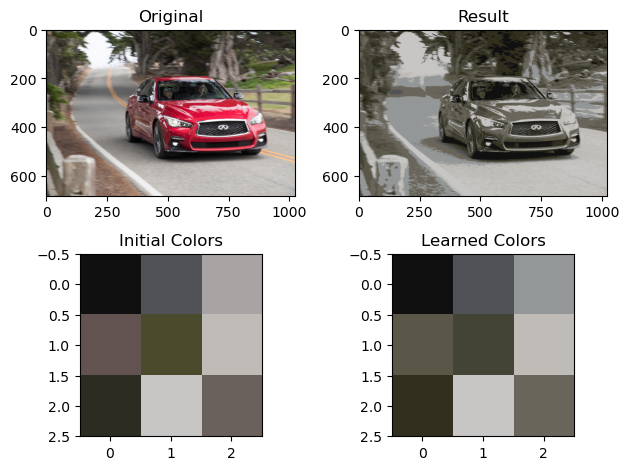

In [10]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Sample data
data = np.array([[0.80, 0.55, 0.22, 0.03],
                 [0.82, 0.50, 0.23, 0.03],
                 [0.80, 0.54, 0.22, 0.03],
                 [0.80, 0.53, 0.26, 0.03],
                 [0.79, 0.56, 0.22, 0.03],
                 [0.75, 0.60, 0.25, 0.03],
                 [0.77, 0.59, 0.22, 0.03]])

# Load image
img = plt.imread('car.jpg')
# Convert image to the correct shape and normalize
if img.ndim == 3 and img.shape[2] == 4:  # Check if the image has an alpha channel
    img = img[:, :, :3]  # Remove the alpha channel
pixels = np.reshape(img, (img.shape[0] * img.shape[1], 3))
pixels = pixels.astype(np.float32) / 255.0  # Normalize pixel values

# SOM initialization and training
print('Training...')
som = MiniSom(3, 3, 3, sigma=0.1, learning_rate=0.2)  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # Save initial weights
som.train_random(pixels, 100)

# Quantize each pixel of the image
qnt = som.quantization(pixels)

# Place the quantized values into a new image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):
    # Use img.shape to determine the correct indices
    clustered[np.unravel_index(i, img.shape[:2])] = q * 255.0  # Denormalize

print('Done.')

# Show the result
plt.figure(1)
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Result')
plt.imshow(clustered.astype(np.uint8))

plt.subplot(223)
plt.title('Initial Colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('Learned Colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

### DeepSeek

training...
done.


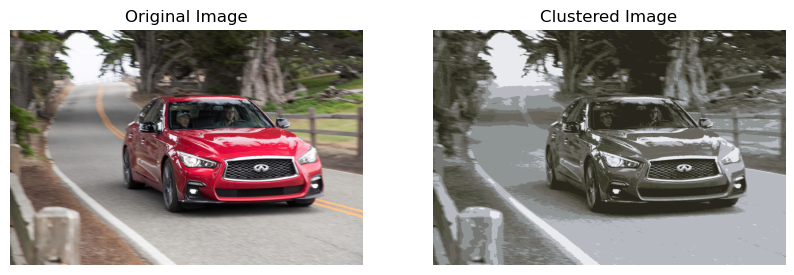

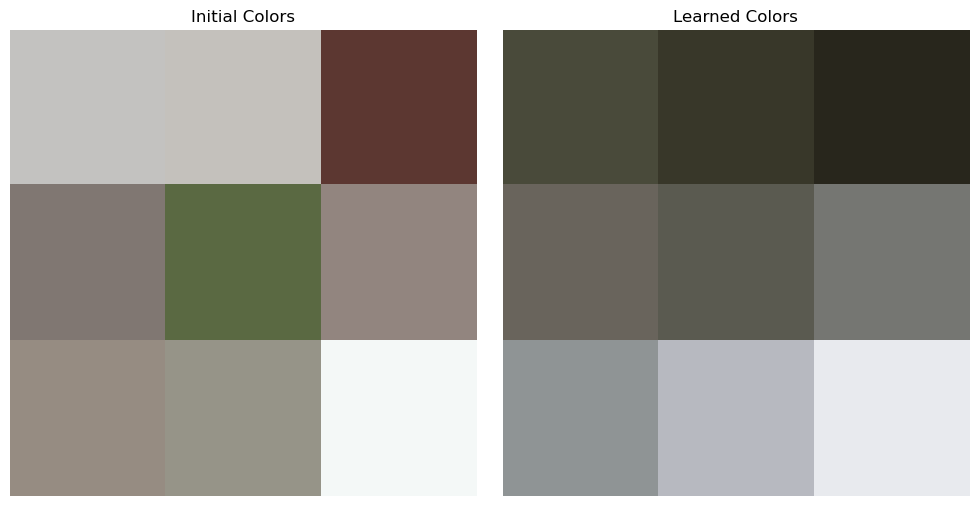

In [18]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 加载图片并确保为RGB格式
img = Image.open('car.jpg').convert('RGB')
img = np.array(img) / 255.0

# 重塑像素数据
pixels = img.reshape(-1, 3)

# SOM初始化
print('training...')
som = MiniSom(3, 3, 3, sigma=1.0, learning_rate=0.2)
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()
som.train_random(pixels, 500)
qnt = som.quantization(pixels)

# 修正后的关键行：使用 shape 参数
clustered = np.zeros_like(img)
for i, q in enumerate(qnt):
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q  # 修改点

print('done.')

# 可视化（保持原样）
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Clustered Image')
plt.imshow(clustered)
plt.axis('off')


# 可视化颜色演变
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Initial Colors')
plt.imshow(starting_weights, interpolation='none')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Learned Colors')
plt.imshow(som.get_weights(), interpolation='none')
plt.axis('off')

plt.tight_layout()

plt.show()

### SGD

Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 0.9721 - val_accuracy: 0.9177 - val_loss: 0.2796
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9220 - loss: 0.2666 - val_accuracy: 0.9394 - val_loss: 0.2078
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9416 - loss: 0.1966 - val_accuracy: 0.9490 - val_loss: 0.1739
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1581 - val_accuracy: 0.9542 - val_loss: 0.1574
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1357 - val_accuracy: 0.9621 - val_loss: 0.1337
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1145 - val_accuracy: 0.9613 - val_loss: 0.1305
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1039 - val_accuracy: 0.9652 - val_loss: 0.1201
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0907 - val_accuracy: 0.9664 - val_

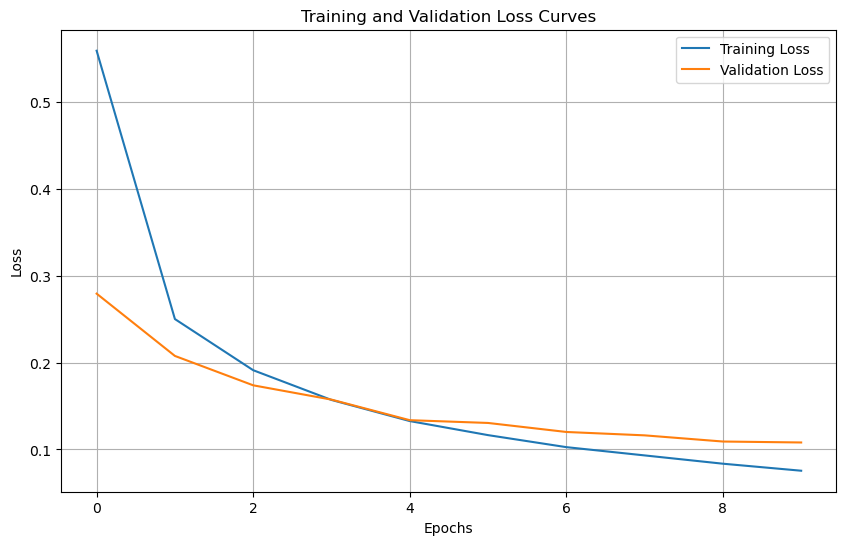

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

# 加载并准备数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 归一化像素值到[0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 将图像数据展平为1D数组
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# 将标签转换为独热编码
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 构建神经网络模型
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 使用SGD优化器编译模型
sgd_optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型并记录历史
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# 评估模型
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 绘制训练和验证损失曲线
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.9068 - val_accuracy: 0.9177 - val_loss: 0.2841
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2716 - val_accuracy: 0.9379 - val_loss: 0.2182
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.2044 - val_accuracy: 0.9486 - val_loss: 0.1760
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9496 - loss: 0.1722 - val_accuracy: 0.9566 - val_loss: 0.1555
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1449 - val_accuracy: 0.9588 - val_loss: 0.1394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1254 - val_accuracy: 0.9616 - val_loss: 0.1326
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1111 - val_accuracy: 0.9567 - val_loss: 0.1412
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0996 - val_accuracy: 0.

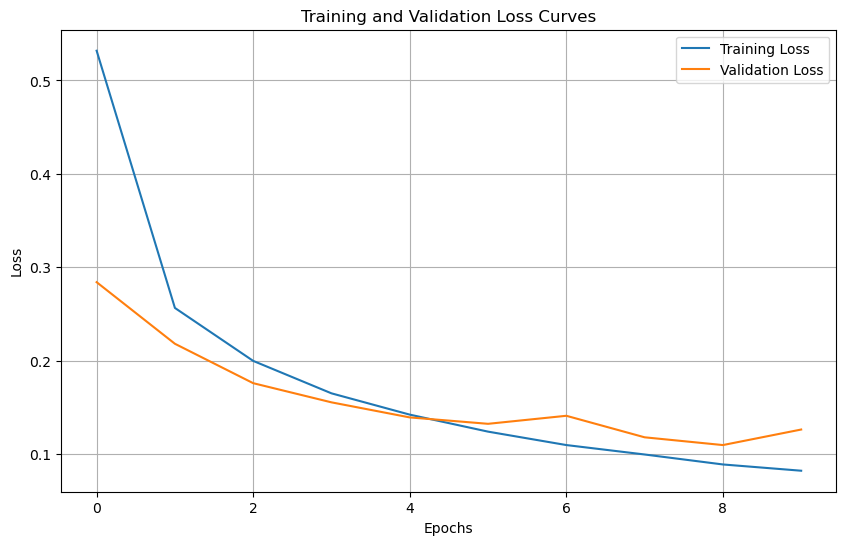

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.utils import to_categorical

# 加载并准备数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 归一化像素值到[0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 将图像数据展平为1D数组
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# 将标签转换为独热编码
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 构建神经网络模型
model = Sequential()
model.add(Input(shape=(28 * 28,)))  # 使用Input层指定输入形状
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 使用SGD优化器编译模型
sgd_optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型并记录历史
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# 评估模型
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 绘制训练和验证损失曲线
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()